## Load the new dataset


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Salary_Data.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head().T)

# Display columns and their data types
print("\nColumn information:")
display(df.info())

First 5 rows of the dataset:


,0,1,2,3,4
Age,32.0,28.0,45.0,36.0,52.0
Gender,Male,Female,Male,Female,Male
Education Level,Bachelor's,Master's,PhD,Bachelor's,Master's
Job Title,Software Engineer,Data Analyst,Senior Manager,Sales Associate,Director
Years of Experience,5.0,3.0,15.0,7.0,20.0
Salary,90000.0,65000.0,150000.0,60000.0,200000.0



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


None

## Initial Data Exploration and Preprocessing


In [ ]:
# Check for missing values
print("Missing values before handling:")
display(df.isnull().sum())

# Handle missing values by dropping rows with any missing values
df.dropna(inplace=True)

print("\nMissing values after handling:")
display(df.isnull().sum())

print("\nDataFrame shape after handling missing values:", df.shape)

Missing values before handling:


,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5



Missing values after handling:


,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0



DataFrame shape after handling missing values: (6698, 6)


In [ ]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=np.number).columns

print("Categorical columns:", categorical_cols.tolist())
print("Numerical columns:", numerical_cols.tolist())

Categorical columns: ['Gender', 'Education Level', 'Job Title']
Numerical columns: ['Age', 'Years of Experience', 'Salary']


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import joblib # Import joblib to save preprocessor and scaler

# Define the target variable
target = 'Salary'

# Identify features
features = df.drop(columns=[target])

# Identify categorical and numerical features
categorical_features = features.select_dtypes(include=['object']).columns
numerical_features = features.select_dtypes(include=np.number).columns

# Create preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing to features
X = preprocessor.fit_transform(features)

# Scale the target variable
scaler = StandardScaler()
y = scaler.fit_transform(df[[target]])

# Save the preprocessor and scaler objects
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Shape of preprocessed features (X):", X.shape)
print("Shape of scaled target (y):", y.shape)
print("\nPreprocessor saved successfully as 'preprocessor.pkl'")
print("Scaler saved successfully as 'scaler.pkl'")

Shape of preprocessed features (X): (6698, 203)
Shape of scaled target (y): (6698, 1)

Preprocessor saved successfully as 'preprocessor.pkl'
Scaler saved successfully as 'scaler.pkl'


In [ ]:
# Save the cleaned DataFrame (after handling missing values) to a CSV file
cleaned_csv_path = 'cleaned_dataset.csv' # Changed filename to cleaned_dataset.csv
df.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned dataset saved to '{cleaned_csv_path}'")
print("You can download this file from the Google Colab file browser.")

Cleaned dataset saved to 'cleaned_dataset.csv'
You can download this file from the Google Colab file browser.


## Split Data

Split the preprocessed feature matrix `X` and the scaled target variable `y` into training and testing sets using a standard split ratio (e.g., 80% train, 20% test). This will allow for proper model training and evaluation on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets - 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape} | Test shape: {X_test.shape}")

Train shape: (5358, 203) | Test shape: (1340, 203)


## Machine Learning Models



Train and evaluate Linear Regression, RandomForestRegressor, and GradientBoostingRegressor models to establish a baseline performance.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Import joblib to save preprocessor and scaler
import pandas as pd # Import pandas to reload df if needed

""" THIS PROJECT IS MADE BY JAI KISHORE MAHORE, STUDENT OF MITS GWALIOR, ON 22-JULY-2025,
    AS A 6 WEEK AIML IBM AND EDUNET FOUNDATION INTERNSHIP FINAL PROJECT.
    MY LINKEDIN HANDLE: https://www.linkedin.com/in/jai-kishore-mahore-a278652b0/
"""

# Ensure scaler and preprocessor are loaded and data is prepared correctly
try:
    scaler = joblib.load('scaler.pkl')
    preprocessor = joblib.load('preprocessor.pkl')

    # Reload the original data
    df = pd.read_csv("/content/Salary_Data.csv")

    # Handle missing values (as done previously)
    df.dropna(inplace=True)

    # Define the target variable and features
    target = 'Salary'
    features = df.drop(columns=[target])
    y_original = df[[target]] # Keep the original target

    # Apply preprocessing to features
    X = preprocessor.transform(features) # Use transform, not fit_transform

    # Split features and ORIGINAL target into train and test sets - 80% train, 20% test
    X_train, X_test, y_original_train, y_original_test = train_test_split(X, y_original, test_size=0.2, random_state=42)

    # Scale the target variable subsets separately for training and scaled evaluation
    # Use the already loaded scaler fitted on the entire original target in a previous cell
    y_train_scaled = scaler.transform(y_original_train)
    y_test_scaled = scaler.transform(y_original_test)


    print("Assets loaded, data reloaded, preprocessed, and split successfully.")

    # Check shapes after splitting and scaling
    print(f"X_train shape: {X_train.shape}, y_original_train shape: {y_original_train.shape}, y_train_scaled shape: {y_train_scaled.shape}")
    print(f"X_test shape: {X_test.shape}, y_original_test shape: {y_original_test.shape}, y_test_scaled shape: {y_test_scaled.shape}")


except FileNotFoundError as e:
    print(f"Error loading asset file: {e}. Cannot perform model evaluation. Please ensure all required .pkl and .csv files are in the correct directory.")
    # Set variables to None or handle error appropriately if files are missing
    rf_model, scaler, preprocessor, X_train, X_test, y_original_train, y_original_test, y_train_scaled, y_test_scaled = [None] * 9
except Exception as e:
     print(f"An unexpected error occurred during asset loading or data prep: {e}")
     # Set variables to None or handle error appropriately if error occurs
     rf_model, scaler, preprocessor, X_train, X_test, y_original_train, y_original_test, y_train_scaled, y_test_scaled = [None] * 9


# Check if necessary variables are available before proceeding with model training and evaluation
if X_train is not None and y_train_scaled is not None and X_test is not None and y_test_scaled is not None and y_original_test is not None and scaler is not None:

    # Initialize and train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train_scaled) # Train on scaled target

    # Make predictions on the test set (scaled)
    y_pred_lr_scaled = lr_model.predict(X_test)

    # Evaluate the model on scaled data
    mae_lr_scaled = mean_absolute_error(y_test_scaled, y_pred_lr_scaled)
    mse_lr_scaled = mean_squared_error(y_test_scaled, y_pred_lr_scaled)
    r2_lr = r2_score(y_test_scaled, y_pred_lr_scaled)

    # Calculate MAE in original salary scale (Inverse transform predictions, then calculate MAE)
    y_pred_lr_original_scale = scaler.inverse_transform(y_pred_lr_scaled)
    mae_original_scale_lr = mean_absolute_error(y_original_test, y_pred_lr_original_scale) # Compare with ORIGINAL test target


    print("\nLinear Regression Evaluation:")
    print(f"Mean Absolute Error (MAE) [Scaled]: {mae_lr_scaled:.4f}")
    print(f"Mean Squared Error (MSE) [Scaled]: {mse_lr_scaled:.4f}")
    print(f"R-squared (R2): {r2_lr:.4f}")
    print(f"Mean Absolute Error (MAE) [Original Scale]: {mae_original_scale_lr:,.2f}")

    print("-" * 30)

    # Initialize and train the RandomForestRegressor model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train_scaled.ravel()) # Train on scaled target, use ravel() for 1D array

    # Make predictions on the test set (scaled)
    y_pred_rf_scaled = rf_model.predict(X_test)

    # Evaluate the model on scaled data
    mae_rf_scaled = mean_absolute_error(y_test_scaled, y_pred_rf_scaled)
    mse_rf_scaled = mean_squared_error(y_test_scaled, y_pred_rf_scaled)
    r2_rf = r2_score(y_test_scaled, y_pred_rf_scaled)

    # Calculate MAE in original salary scale (Inverse transform predictions, then calculate MAE)
    y_pred_rf_original_scale = scaler.inverse_transform(y_pred_rf_scaled.reshape(-1, 1)) # Reshape needed for inverse_transform
    mae_original_scale_rf = mean_absolute_error(y_original_test, y_pred_rf_original_scale) # Compare with ORIGINAL test target


    print("RandomForestRegressor Evaluation:")
    print(f"Mean Absolute Error (MAE) [Scaled]: {mae_rf_scaled:.4f}")
    print(f"Mean Squared Error (MSE) [Scaled]: {mse_rf_scaled:.4f}")
    print(f"R-squared (R2): {r2_rf:.4f}")
    print(f"Mean Absolute Error (MAE) [Original Scale]: {mae_original_scale_rf:,.2f}")

    print("-" * 30)

    # Initialize and train the GradientBoostingRegressor model
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_model.fit(X_train, y_train_scaled.ravel()) # Train on scaled target, use ravel() for 1D array

    # Make predictions on the test set (scaled)
    y_pred_gb_scaled = gb_model.predict(X_test)

    # Evaluate the model on scaled data
    mae_gb_scaled = mean_absolute_error(y_test_scaled, y_pred_gb_scaled)
    mse_gb_scaled = mean_squared_error(y_test_scaled, y_pred_gb_scaled)
    r2_gb = r2_score(y_test_scaled, y_pred_gb_scaled)

     # Calculate MAE in original salary scale (Inverse transform predictions, then calculate MAE)
    y_pred_gb_original_scale = scaler.inverse_transform(y_pred_gb_scaled.reshape(-1, 1)) # Reshape needed for inverse_transform
    mae_original_scale_gb = mean_absolute_error(y_original_test, y_pred_gb_original_scale) # Compare with ORIGINAL test target


    print("GradientBoostingRegressor Evaluation:")
    print(f"Mean Absolute Error (MAE) [Scaled]: {mae_gb_scaled:.4f}")
    print(f"Mean Squared Error (MSE) [Scaled]: {mse_gb_scaled:.4f}")
    print(f"R-squared (R2): {r2_gb:.4f}")
    print(f"Mean Absolute Error (MAE) [Original Scale]: {mae_original_scale_gb:,.2f}")

else:
    print("Required variables for model evaluation are not available due to errors in asset loading or data prep.")

Assets loaded, data reloaded, preprocessed, and split successfully.
X_train shape: (5358, 203), y_original_train shape: (5358, 1), y_train_scaled shape: (5358, 1)
X_test shape: (1340, 203), y_original_test shape: (1340, 1), y_test_scaled shape: (1340, 1)

Linear Regression Evaluation:
Mean Absolute Error (MAE) [Scaled]: 0.2513
Mean Squared Error (MSE) [Scaled]: 0.1284
R-squared (R2): 0.8746
Mean Absolute Error (MAE) [Original Scale]: 13,265.84
------------------------------
RandomForestRegressor Evaluation:
Mean Absolute Error (MAE) [Scaled]: 0.0514
Mean Squared Error (MSE) [Scaled]: 0.0171
R-squared (R2): 0.9833
Mean Absolute Error (MAE) [Original Scale]: 2,712.18
------------------------------
GradientBoostingRegressor Evaluation:
Mean Absolute Error (MAE) [Scaled]: 0.2055
Mean Squared Error (MSE) [Scaled]: 0.0747
R-squared (R2): 0.9270
Mean Absolute Error (MAE) [Original Scale]: 10,846.01


## Model Evaluation Comparison


In [15]:
import pandas as pd

# Create a dictionary to store the evaluation data
evaluation_data = {
    'Model': ['Linear Regression', 'RandomForestRegressor', 'GradientBoostingRegressor'],
    # Use the correctly calculated scaled MAE and MSE from cell 18f14122
    'MAE (Scaled)': [mae_lr_scaled, mae_rf_scaled, mae_gb_scaled],
    'MSE (Scaled)': [mse_lr_scaled, mse_rf_scaled, mse_gb_scaled],
    'R2': [r2_lr, r2_rf, r2_gb],
    # Use the correctly calculated MAE in original scale from cell 18f14122
    'MAE (Original Scale)': [mae_original_scale_lr, mae_original_scale_rf, mae_original_scale_gb]
}

# Create a DataFrame from the evaluation data
evaluation_df = pd.DataFrame(evaluation_data)

# Display the evaluation DataFrame
print("Model Evaluation Comparison:")
display(evaluation_df)

Model Evaluation Comparison:


,Model,MAE (Scaled),MSE (Scaled),R2,MAE (Original Scale)
0,Linear Regression,0.251314,0.128351,0.874580,13265.839661
1,RandomForestRegressor,0.051381,0.017116,0.983275,2712.184960
2,GradientBoostingRegressor,0.205472,0.074688,0.927018,10846.014530


## Model Evaluation Comparison (Visualization)


**Reasoning**:
Create bar plots to visualize the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for each model to provide a clear visual comparison of their performance.

/tmp/ipython-input-18-1821678676.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-18-1821678676.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-18-1821678676.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




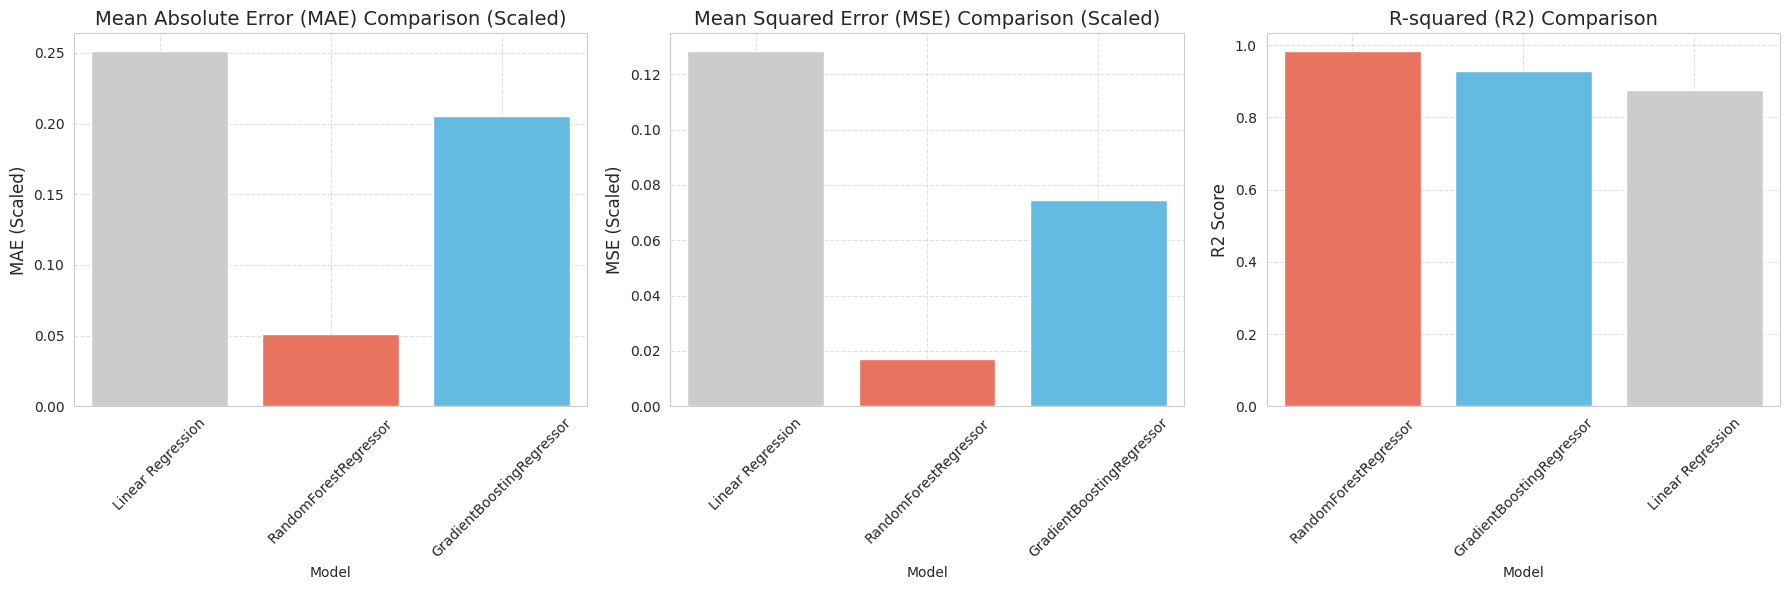

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define a color palette, highlighting the best model if possible, or using red accents
colors = ['#CCCCCC', '#FF6347', '#4FC3F7'] # Grey for others, Tomato Red for best (RF), Pastel Blue for GB

# Plot MAE
# Corrected column name from 'MAE' to 'MAE (Scaled)'
sns.barplot(x='Model', y='MAE (Scaled)', data=evaluation_df, ax=axes[0], palette=colors)
axes[0].set_title('Mean Absolute Error (MAE) Comparison (Scaled)', fontsize=14)
axes[0].set_ylabel('MAE (Scaled)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.6) # Add grid

# Plot MSE
# Corrected column name from 'MSE' to 'MSE (Scaled)'
sns.barplot(x='Model', y='MSE (Scaled)', data=evaluation_df, ax=axes[1], palette=colors)
axes[1].set_title('Mean Squared Error (MSE) Comparison (Scaled)', fontsize=14)
axes[1].set_ylabel('MSE (Scaled)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.6) # Add grid

# Plot R2
# Sort by R2 for better visualization of the best model
evaluation_df_sorted = evaluation_df.sort_values(by='R2', ascending=False)
colors_sorted = [colors[evaluation_df['Model'].tolist().index(model)] for model in evaluation_df_sorted['Model']]

sns.barplot(x='Model', y='R2', data=evaluation_df_sorted, ax=axes[2], palette=colors_sorted)
axes[2].set_title('R-squared (R2) Comparison', fontsize=14)
axes[2].set_ylabel('R2 Score', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, linestyle='--', alpha=0.6) # Add grid

plt.tight_layout()
plt.show()

## Save the Best Model


In [16]:
import joblib

# Save the best model (RandomForestRegressor)
joblib.dump(rf_model, 'model.pkl')

print("Best model saved successfully as 'model.pkl'")

Best model saved successfully as 'model.pkl'


## Visualization


Generate predicted vs. actual and residual plots for the best-performing model (RandomForestRegressor) to further analyze its performance and identify any patterns in the predictions and errors.

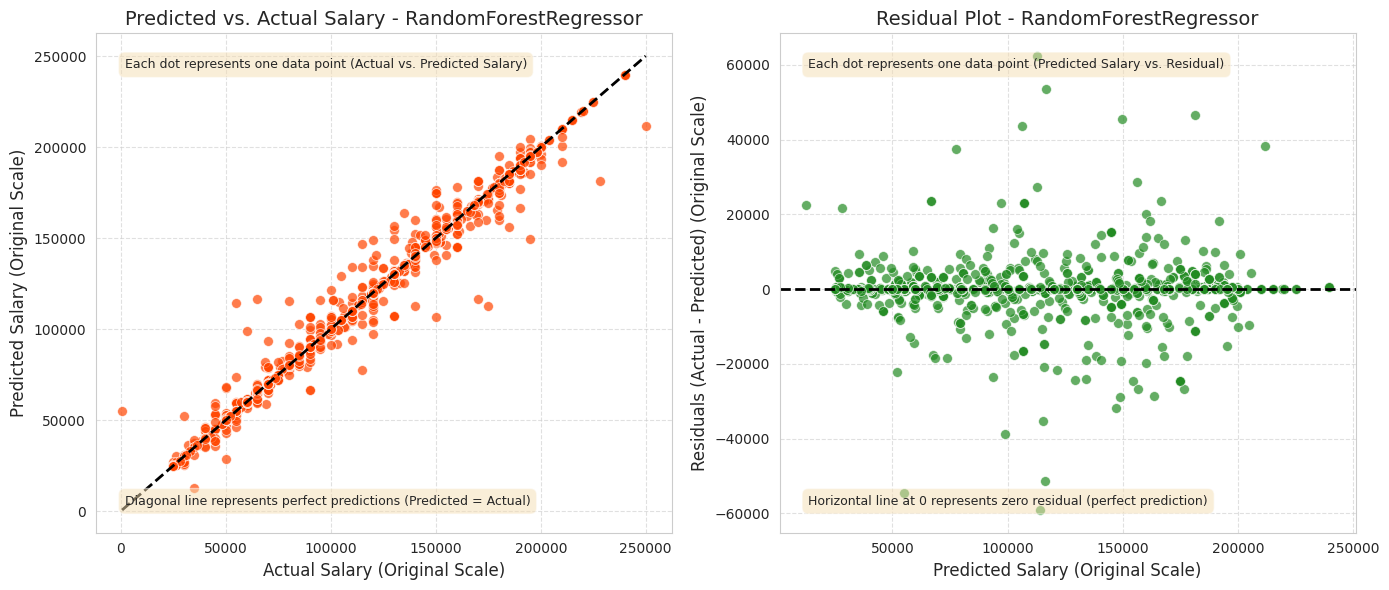

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib # Import joblib to load preprocessor if needed
from sklearn.model_selection import train_test_split # Needed if splitting again

# Get predictions for the best model (RandomForestRegressor) on the test set
# Ensure rf_model, X_test, y_test, preprocessor, scaler, and y_original_test are available
if 'rf_model' in globals() and 'X_test' in globals() and 'y_test' in globals() and 'preprocessor' in globals() and 'scaler' in globals() and 'y_original_test' in globals():

    # --- Proceed with Plotting if Data is Available ---
    y_pred_best_model_scaled = rf_model.predict(X_test) # Using rf_model

    # Inverse transform predictions to original scale
    y_pred_best_model_original_scale = scaler.inverse_transform(y_pred_best_model_scaled.reshape(-1, 1))
    # Ensure y_test is in the correct format for calculation (flatten if it's a DataFrame)
    residuals_original_scale = y_test.values.flatten() - y_pred_best_model_original_scale.flatten()


    # Create a figure with two subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjusted figure size

    # --- Predicted vs. Actual Plot (Original Scale) ---
    # Simple scatter plot with a single non-blue color
    sns.scatterplot(x=y_test.values.flatten(), y=y_pred_best_model_original_scale.flatten(),
                    ax=axes[0], color='orangered', s=50, alpha=0.7) # Using orangered color
    axes[0].set_title('Predicted vs. Actual Salary - RandomForestRegressor', fontsize=14)
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line
    axes[0].set_xlabel("Actual Salary (Original Scale)", fontsize=12)
    axes[0].set_ylabel("Predicted Salary (Original Scale)", fontsize=12)
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # Add text annotations
    axes[0].text(0.05, 0.95, 'Each dot represents one data point (Actual vs. Predicted Salary)', transform=axes[0].transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
    axes[0].text(0.05, 0.05, 'Diagonal line represents perfect predictions (Predicted = Actual)', transform=axes[0].transAxes, fontsize=9, verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


    # --- Residual Plot (Original Scale) ---
    # Simple scatter plot with a different single non-blue color
    sns.scatterplot(x=y_pred_best_model_original_scale.flatten(), y=residuals_original_scale,
                    ax=axes[1], color='forestgreen', s=50, alpha=0.7) # Using forestgreen color
    axes[1].set_title('Residual Plot - RandomForestRegressor', fontsize=14)
    axes[1].axhline(y=0, color='k', linestyle='--', lw=2) # Add a horizontal line at 0
    axes[1].set_xlabel("Predicted Salary (Original Scale)", fontsize=12)
    axes[1].set_ylabel("Residuals (Actual - Predicted) (Original Scale)", fontsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.6)

    # Add text annotations
    axes[1].text(0.05, 0.95, 'Each dot represents one data point (Predicted Salary vs. Residual)', transform=axes[1].transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
    axes[1].text(0.05, 0.05, 'Horizontal line at 0 represents zero residual (perfect prediction)', transform=axes[1].transAxes, fontsize=9, verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()
else:
    print("Required variables for plotting not found. Please run preceding cells.")